In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel(r'C:\Users\original\Desktop\DEPI\PROJECT.PYTHON .xlsx')


In [4]:
df

,country,iso3,region,income_group,year,sector,gas,emissions_ktco2e
0,Algeria,DZA,Africa,Upper-middle,1990,Buildings,CO2,29253.59
1,Algeria,DZA,Africa,Upper-middle,1990,Power,CH4,518.53
2,Algeria,DZA,Africa,Upper-middle,1990,Waste,N2O,2006.21
3,Algeria,DZA,Africa,Upper-middle,1991,Industry,F-Gases,1416.66
4,Algeria,DZA,Africa,Upper-middle,1991,Industry,N2O,1469.93
...,...,...,...,...,...,...,...,...
4995,Vietnam,VNM,Asia,Lower-middle,2023,LULUCF,N2O,274.24
4996,Vietnam,VNM,Asia,Lower-middle,2023,Power,N2O,2951.30
4997,Vietnam,VNM,Asia,Lower-middle,2024,Buildings,CH4,2249.45
4998,Vietnam,VNM,Asia,Lower-middle,2024,Industry,CH4,6481.88


In [5]:
df.head()

,country,iso3,region,income_group,year,sector,gas,emissions_ktco2e
0,Algeria,DZA,Africa,Upper-middle,1990,Buildings,CO2,29253.59
1,Algeria,DZA,Africa,Upper-middle,1990,Power,CH4,518.53
2,Algeria,DZA,Africa,Upper-middle,1990,Waste,N2O,2006.21
3,Algeria,DZA,Africa,Upper-middle,1991,Industry,F-Gases,1416.66
4,Algeria,DZA,Africa,Upper-middle,1991,Industry,N2O,1469.93


In [6]:
df.tail()

,country,iso3,region,income_group,year,sector,gas,emissions_ktco2e
4995,Vietnam,VNM,Asia,Lower-middle,2023,LULUCF,N2O,274.24
4996,Vietnam,VNM,Asia,Lower-middle,2023,Power,N2O,2951.30
4997,Vietnam,VNM,Asia,Lower-middle,2024,Buildings,CH4,2249.45
4998,Vietnam,VNM,Asia,Lower-middle,2024,Industry,CH4,6481.88
4999,Vietnam,VNM,Asia,Lower-middle,2024,Power,N2O,3353.09


In [7]:
df.describe()

,year,emissions_ktco2e
count,5000.000000,5000.000000
mean,2007.109800,20911.987682
std,10.056161,71606.761885
min,1990.000000,-286864.060000
25%,1998.000000,0.000000
50%,2007.000000,1405.740000
75%,2016.000000,10662.177500
max,2024.000000,938280.360000


In [8]:
df.columns

Index(['country', 'iso3', 'region', 'income_group', 'year', 'sector', 'gas',
       'emissions_ktco2e'],
      dtype='object')

In [9]:
df.shape

(5000, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           5000 non-null   object 
 1   iso3              5000 non-null   object 
 2   region            5000 non-null   object 
 3   income_group      5000 non-null   object 
 4   year              5000 non-null   int64  
 5   sector            5000 non-null   object 
 6   gas               5000 non-null   object 
 7   emissions_ktco2e  5000 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 312.6+ KB


In [11]:
df.isnull().sum()


country             0
iso3                0
region              0
income_group        0
year                0
sector              0
gas                 0
emissions_ktco2e    0
dtype: int64

In [12]:
df.duplicated().sum()


0

Text(0, 0.5, 'Total Emissions')

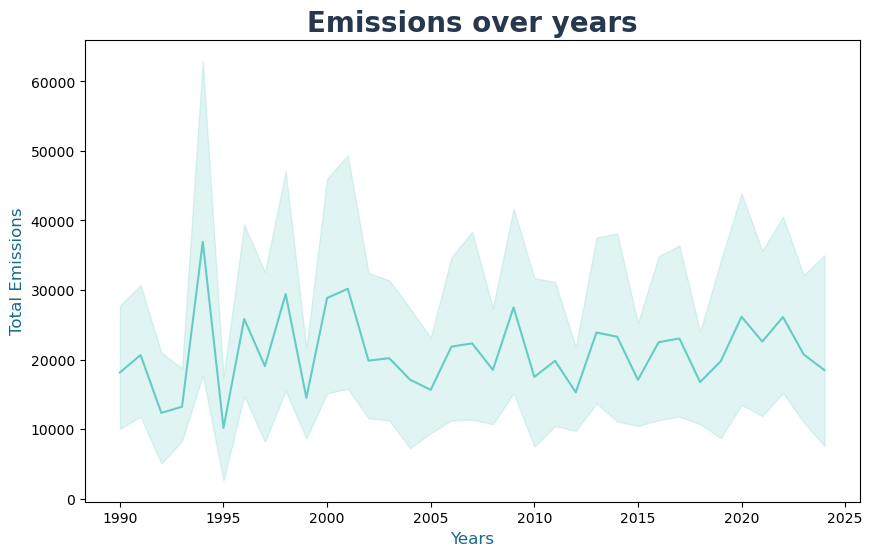

In [13]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="year", y="emissions_ktco2e" ,color="#64CCC5")
plt.title("Emissions over years", fontsize=20, color="#27374D",fontweight=700)
plt.xlabel("Years", fontsize=12, color="#176B87")

plt.ylabel("Total Emissions",fontsize=12, color="#176B87")


In [14]:
topten=df.groupby("country")["emissions_ktco2e"].sum().nlargest(10).reset_index()


In [15]:
topten

,country,emissions_ktco2e
0,China,14113773.37
1,France,8907765.88
2,Russia,6774335.86
3,India,6164962.68
4,Nigeria,5181351.02
5,Spain,4157289.34
6,Mexico,3792908.82
7,Japan,3647899.38
8,South Africa,3544053.64
9,Germany,2535084.80


Text(0, 0.5, 'Total Emissions')

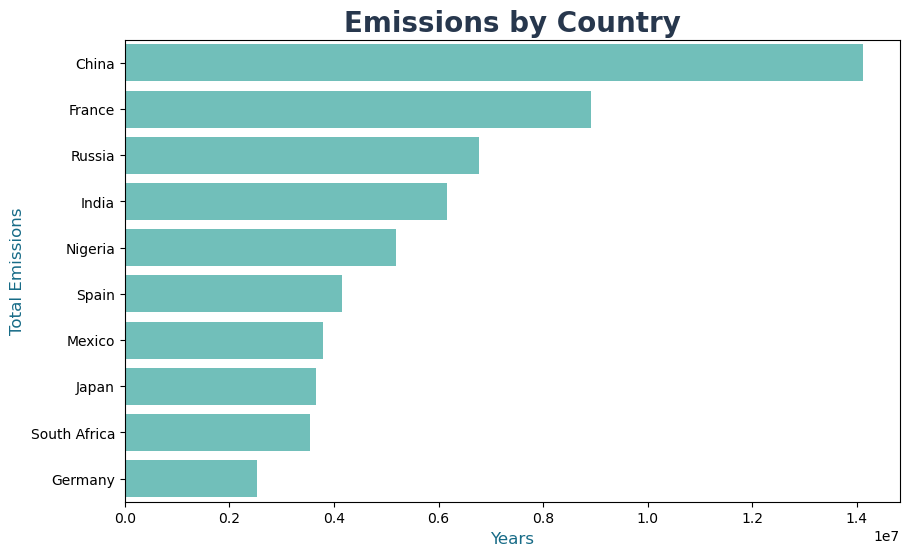

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(data=topten,x='emissions_ktco2e',y="country",color="#64CCC5")
plt.title("Emissions by Country", fontsize=20, color="#27374D",fontweight=700)
plt.xlabel("Years", fontsize=12, color="#176B87")

plt.ylabel("Total Emissions",fontsize=12, color="#176B87")


In [17]:
region=df.groupby("region")["emissions_ktco2e"].sum() .reset_index()

In [18]:
region

,region,emissions_ktco2e
0,Africa,14119145.48
1,Americas,12146038.86
2,Asia,43119444.31
3,Europe,32833612.79
4,Oceania,2341696.97


Text(0.5, 1.0, 'Emissions by Continent ')

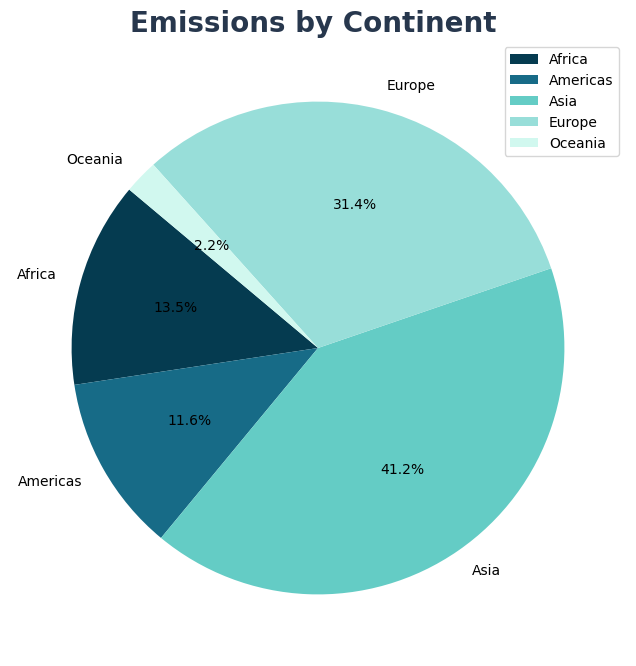

In [19]:
mint_colors = ["#053B50", "#176B87", "#64CCC5", "#98DED9","#D1F8EF"]
plt.figure(figsize=(8,8))
plt.pie(region["emissions_ktco2e"], 
        labels=region["region"], 
        autopct="%1.1f%%", 
        startangle=140, 
       colors=mint_colors[:len(region)] )
plt.legend(labels=region["region"])
plt.title("Emissions by Continent ", fontsize=20, color="#27374D",fontweight=700)

In [20]:
income_group=df.groupby("income_group")["emissions_ktco2e"].sum().reset_index()


In [21]:
income_group

,income_group,emissions_ktco2e
0,High,43116609.67
1,Low,754472.70
2,Lower-middle,21314447.42
3,Upper-middle,39374408.62


Text(0.5, 1.0, 'Emissions by Income Group')

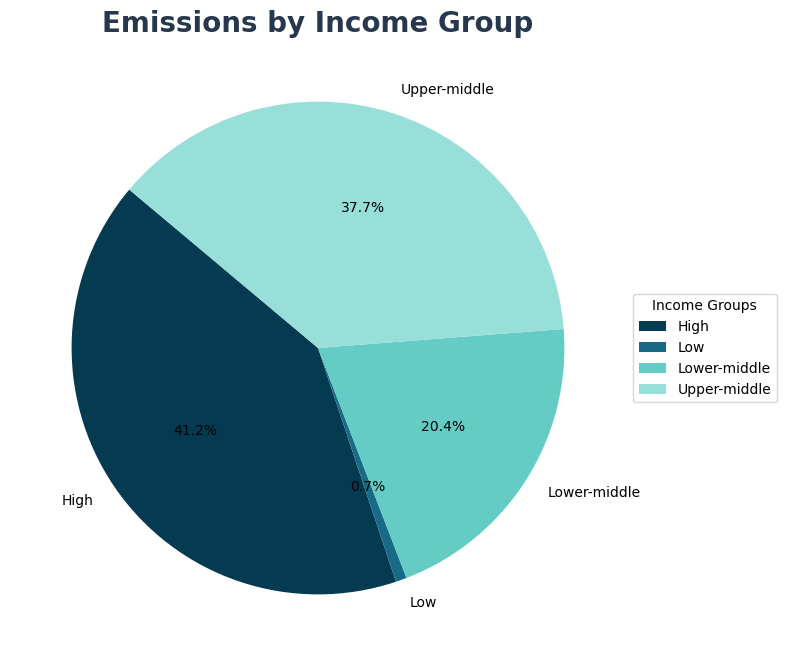

In [22]:
plt.figure(figsize=(8,8))
plt.pie(income_group["emissions_ktco2e"], 
        labels=income_group["income_group"], 
        autopct="%1.1f%%", 
        startangle=140, 
        colors=mint_colors[:len(income_group)] )

plt.legend(labels=income_group["income_group"],   # الليبلز بتاعة الليجند
           title="Income Groups", 
           loc="center left", 
           bbox_to_anchor=(1, 0.5))   
plt.title("Emissions by Income Group", fontsize=20, color="#27374D",fontweight=700)


In [23]:
sector=df.groupby("sector")["emissions_ktco2e"].sum().reset_index()

In [24]:
sector


,sector,emissions_ktco2e
0,Agriculture,19721524.37
1,Buildings,11490235.06
2,Industry,19668738.54
3,LULUCF,-2973650.96
4,Power,21491509.59
5,Transport,21091704.26
6,Waste,14069877.55


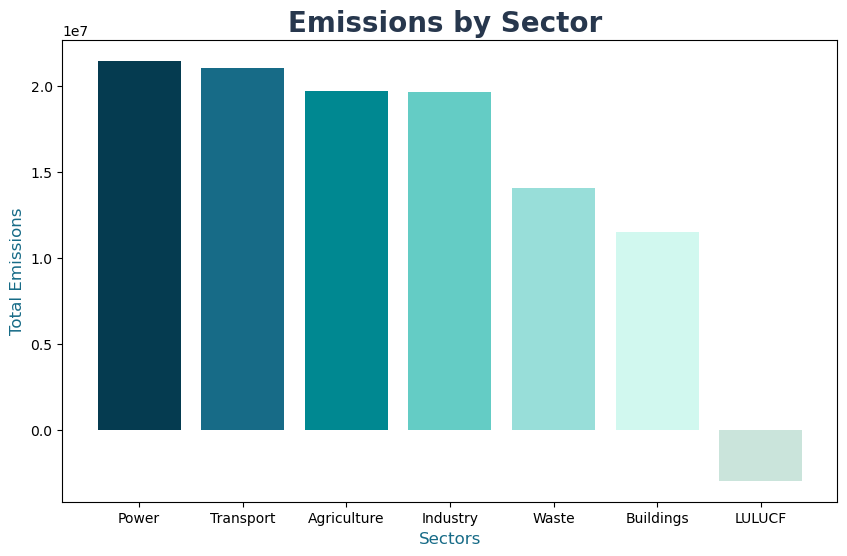

In [25]:
sector_sorted = sector.sort_values("emissions_ktco2e", ascending=False)
mint_color = ["#053B50", "#176B87", "#008891", "#64CCC5", "#98DED9", "#D1F8EF","#CAE4DB"]

plt.figure(figsize=(10,6))
plt.bar(sector_sorted["sector"], 
        sector_sorted["emissions_ktco2e"], 
        color=mint_color[:len(sector_sorted)])

plt.title("Emissions by Sector ", fontsize=20, color="#27374D",fontweight=700)
plt.xlabel("Sectors", fontsize=12, color="#176B87")

plt.ylabel("Total Emissions",fontsize=12, color="#176B87")
plt.show()


In [26]:
gas_emmisions=df.groupby('gas')['emissions_ktco2e'].sum()

Text(0.5, 1.0, 'Emissions by Gas ')

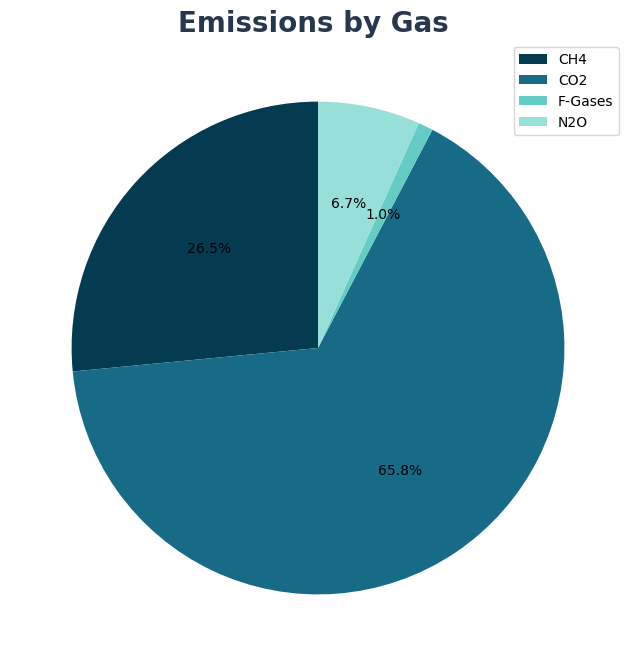

In [27]:
plt.figure(figsize=(8,8))

plt.pie(gas_emmisions,startangle=90,autopct='%1.1f%%', colors=mint_colors[:len(gas_emmisions)])
plt.legend(gas_emmisions.index,bbox_to_anchor=(1, 1))
plt.title("Emissions by Gas ", fontsize=20, color="#27374D",fontweight=700)
 

In [28]:
import plotly.express as px

df_topten = (
    df.groupby(["country", "sector"], as_index=False)["emissions_ktco2e"]
    .sum()
)

top10_countries = (
    df_topten.groupby("country")["emissions_ktco2e"]
    .sum()
    .nlargest(10)
    .index
)

df_topten = df_topten[df_topten["country"].isin(top10_countries)]

custom_colors = ["#053B50", "#176B87", "#008891", "#64CCC5", "#98DED9", "#D1F8EF", "#FFFFFF"]


fig = px.bar(
    df_topten,
    x="country",
    y="emissions_ktco2e",
    color="sector",
    title="Top 10 Countries by Emissions (Aggregated by Sector)",
    width=1000,
    height=600,
    color_discrete_sequence=custom_colors
)


fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Emissions (ktCO2e)",
    legend_title="Sector",
    title_font_size=20,
    title_font_weight=700,
    xaxis_title_font_size=12,
    xaxis_title_font_weight=500,
    yaxis_title_font_size=12, 
    yaxis_title_font_weight=500,
    legend_font_size=10        
)

fig.show()


In [29]:
import plotly.express as px

df_sector = df.groupby(["sector", "gas"], as_index=False)["emissions_ktco2e"].sum()

custom_colors = ["#053B50", "#176B87", "#64CCC5", "#A5F1E9", "#98DED9", "#D1F8EF"]

fig = px.bar(
    df_sector, 
    x="sector", 
    y="emissions_ktco2e", 
    color="gas",
    width=1000,
    height=600,
    title="Emissions by Sector and Gas",
     
    color_discrete_sequence=custom_colors 
)
fig.update_layout(
    title_font_size=20,
       title_font_weight=700,
    
    xaxis_title_font_size=12,
    xaxis_title_font_weight=500,
    yaxis_title_font_size=12, 
    yaxis_title_font_weight=500,
    legend_font_size=10       
)

 
fig.show()


In [30]:
lulucf_negative = df[(df['sector'] == 'LULUCF') & (df['emissions_ktco2e'] < 0)]
 
print(lulucf_negative)

            country iso3    region  income_group  year  sector  gas  \
7           Algeria  DZA    Africa  Upper-middle  1992  LULUCF  N2O   
18          Algeria  DZA    Africa  Upper-middle  1997  LULUCF  CH4   
19          Algeria  DZA    Africa  Upper-middle  1997  LULUCF  N2O   
29          Algeria  DZA    Africa  Upper-middle  1999  LULUCF  CH4   
49          Algeria  DZA    Africa  Upper-middle  2006  LULUCF  N2O   
...             ...  ...       ...           ...   ...     ...  ...   
4772  United States  USA  Americas          High  2017  LULUCF  CO2   
4773  United States  USA  Americas          High  2017  LULUCF  N2O   
4782  United States  USA  Americas          High  2019  LULUCF  N2O   
4784  United States  USA  Americas          High  2020  LULUCF  CH4   
4785  United States  USA  Americas          High  2020  LULUCF  N2O   

      emissions_ktco2e  
7              -253.37  
18             -256.52  
19             -221.74  
29             -229.23  
49             -228.85

C:\Users\original\AppData\Local\Temp\ipykernel_4188\160098707.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



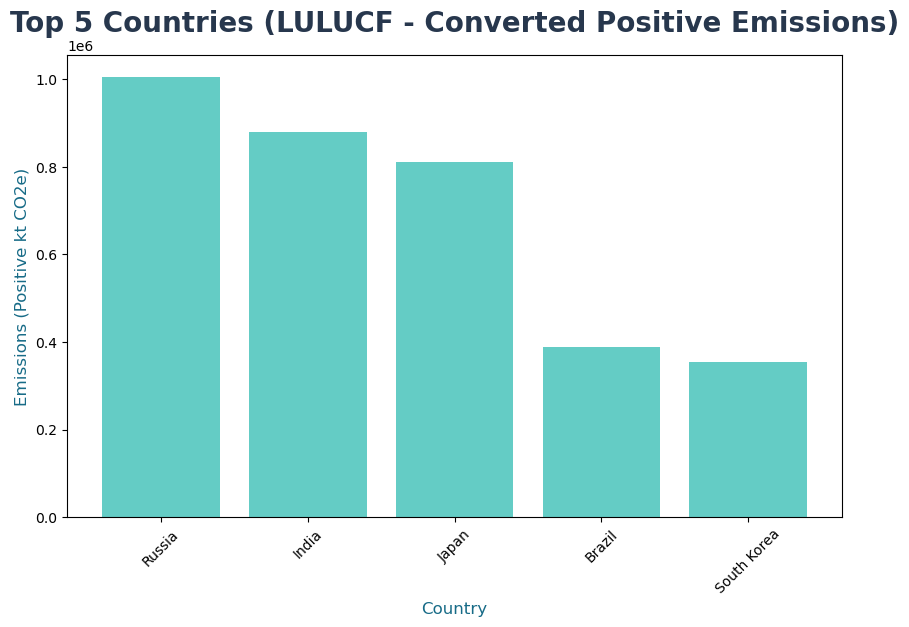

In [31]:

lulucf_negative['emissions_positive'] = lulucf_negative['emissions_ktco2e'].abs()

top5_countries = lulucf_negative.groupby('country')['emissions_positive'].sum().nlargest(5).reset_index()

plt.figure(figsize=(10,6))
plt.bar(top5_countries['country'], top5_countries['emissions_positive'],color="#64CCC5")
 
plt.title('Top 5 Countries (LULUCF - Converted Positive Emissions)', fontsize=20, color="#27374D",fontweight=700)
plt.xlabel('Country', fontsize=12, color="#176B87")

plt.ylabel('Emissions (Positive kt CO2e)',fontsize=12, color="#176B87")
plt.xticks(rotation=45)
plt.show()

In [63]:
df_2010 = df[df['year'] == 2010].groupby('country')['emissions_ktco2e'].sum()
df_2024 = df[df['year'] == 2024].groupby('country')['emissions_ktco2e'].sum()

change = ((df_2024 - df_2010) / df_2010) * 100
change = change.dropna().sort_values()


top5_reducers = change.head(5)


print(top5_reducers)

country
Peru        -1013.651950
Russia       -305.197517
Poland       -100.159782
Norway       -100.000000
Singapore    -100.000000
Name: emissions_ktco2e, dtype: float64


In [33]:
emissions = df[df['year'] == 2010]
emissions

,country,iso3,region,income_group,year,sector,gas,emissions_ktco2e
55,Algeria,DZA,Africa,Upper-middle,2010,Agriculture,CO2,7531.37
56,Algeria,DZA,Africa,Upper-middle,2010,Buildings,F-Gases,0.00
57,Algeria,DZA,Africa,Upper-middle,2010,Industry,CO2,22777.05
58,Algeria,DZA,Africa,Upper-middle,2010,LULUCF,CO2,-26510.70
59,Algeria,DZA,Africa,Upper-middle,2010,Power,CH4,467.81
...,...,...,...,...,...,...,...,...
4853,Venezuela,VEN,Americas,Upper-middle,2010,Industry,CH4,1591.94
4854,Venezuela,VEN,Americas,Upper-middle,2010,Power,CO2,4799.48
4957,Vietnam,VNM,Asia,Lower-middle,2010,Agriculture,N2O,5903.84
4958,Vietnam,VNM,Asia,Lower-middle,2010,Industry,CO2,86998.65


In [34]:
emissions = emissions.groupby('country')['emissions_ktco2e'].sum().reset_index()
emissions

,country,emissions_ktco2e
0,Algeria,31981.68
1,Argentina,42693.92
2,Australia,1298.93
3,Bangladesh,4359.93
4,Brazil,19961.64
5,Canada,152161.49
6,Chile,1022.39
7,China,767167.55
8,Colombia,16829.72
9,Egypt,182848.19


In [35]:
population_df = pd.read_excel("C:\\Users\\original\\Desktop\\DEPI\\populationn.xlsx")
population_df

,country,gdp_usd,pop_millions
0,Egypt,5746.500275,91.175015
1,United States,28938.322602,122.658375
2,China,12378.562583,347.485828
3,India,2025.448874,298.901944
4,Russia,14478.151713,287.472966
5,Brazil,17789.842429,1146.327584
6,United Kingdom,49910.913990,111.567950
7,Germany,78457.164312,40.423184
8,France,63154.387599,100.173002
9,Italy,38625.873841,107.888196


In [36]:
merged_df = pd.merge(emissions, population_df, on='country', how='inner')
merged_df

,country,emissions_ktco2e,gdp_usd,pop_millions
0,Algeria,31981.68,14946.046660,23.726261
1,Argentina,42693.92,23262.060912,21.554641
2,Australia,1298.93,86533.310358,34.743647
3,Bangladesh,4359.93,2047.120267,105.115928
4,Brazil,19961.64,17789.842429,1146.327584
5,Canada,152161.49,54964.072521,36.946106
6,Chile,1022.39,43627.033543,3.787985
7,China,767167.55,12378.562583,347.485828
8,Colombia,16829.72,21805.905879,23.746298
9,Egypt,182848.19,5746.500275,91.175015


In [37]:
merged_df['emissions_per_capita'] = merged_df['emissions_ktco2e'] / merged_df['pop_millions']
merged_df

,country,emissions_ktco2e,gdp_usd,pop_millions,emissions_per_capita
0,Algeria,31981.68,14946.046660,23.726261,1347.944374
1,Argentina,42693.92,23262.060912,21.554641,1980.729786
2,Australia,1298.93,86533.310358,34.743647,37.386116
3,Bangladesh,4359.93,2047.120267,105.115928,41.477349
4,Brazil,19961.64,17789.842429,1146.327584,17.413556
5,Canada,152161.49,54964.072521,36.946106,4118.471633
6,Chile,1022.39,43627.033543,3.787985,269.903359
7,China,767167.55,12378.562583,347.485828,2207.766440
8,Colombia,16829.72,21805.905879,23.746298,708.730262
9,Egypt,182848.19,5746.500275,91.175015,2005.463769


In [56]:

pop_median = merged_df['pop_millions'].median()
emissions_total_median = merged_df['emissions_ktco2e'].median()
emissions_percap_median = merged_df['emissions_per_capita'].median()

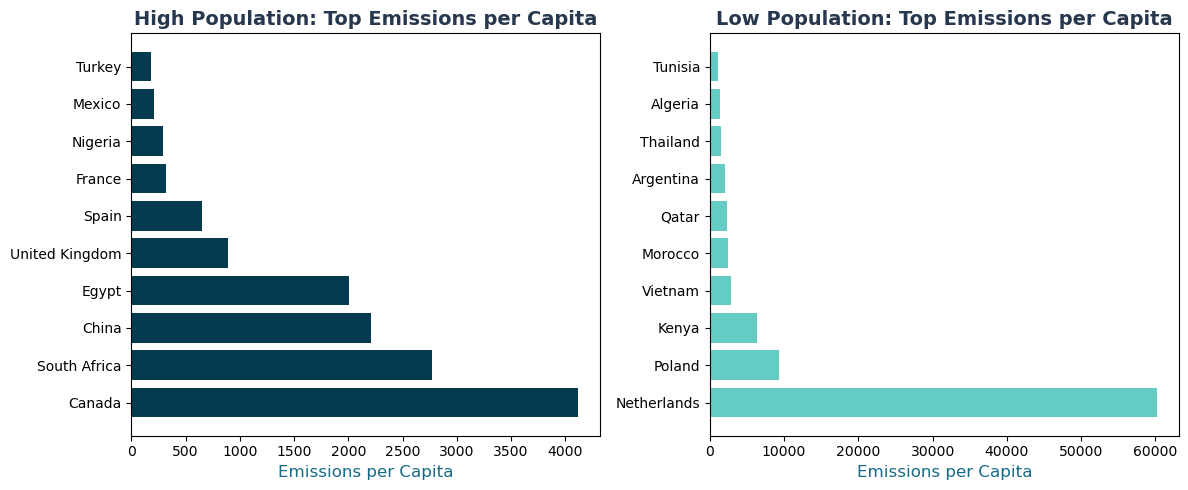

In [58]:
high_pop = merged_df[merged_df['pop_millions'] >= pop_median]
low_pop = merged_df[merged_df['pop_millions'] < pop_median]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.barh(high_pop.sort_values('emissions_per_capita', ascending=False).head(10)['country'],
         high_pop.sort_values('emissions_per_capita', ascending=False).head(10)['emissions_per_capita'], color="#053B50")
plt.title('High Population: Top Emissions per Capita',fontsize=14,fontweight=700, color="#27374D")
plt.xlabel('Emissions per Capita',fontsize=12, color="#176B87")

plt.subplot(1,2,2)
plt.barh(low_pop.sort_values('emissions_per_capita', ascending=False).head(10)['country'],
         low_pop.sort_values('emissions_per_capita', ascending=False).head(10)['emissions_per_capita'], color="#64CCC5")
plt.title('Low Population: Top Emissions per Capita',fontsize=14,fontweight=700, color="#27374D")
plt.xlabel('Emissions per Capita',fontsize=12, color="#176B87")
plt.tight_layout()
plt.show()